In [ ]:

!git clone https://github.com/fredericoaraujopt/section_identification.git
%cd section_identification

!pip install -r requirements.txt


Cloning into 'section_identification'...
remote: Enumerating objects: 311, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 311 (delta 22), reused 29 (delta 11), pack-reused 265 (from 1)
Receiving objects: 100% (311/311), 770.03 MiB | 26.52 MiB/s, done.
Resolving deltas: 100% (134/134), done.


In [ ]:
!pip install matplotlib scikit-image numpy opencv-python pandas scikit-learn torch tqdm ortools

In [ ]:
import sys
import os
from pathlib import Path

from section_identification.section_detector import automatic_identification

package_path = Path(os.path.abspath(""))
apply_filtering = True

example1 = package_path / "images/example1.png"
example2 = package_path / "images/example2.png"
example3 = package_path / "images/example3.png"
example4 = package_path / "images/example4.png"

# the weights can be downloaded from: https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
checkpoint = package_path.parents[0] / "checkpoint/sam_vit_h_4b8939.pth"


Image shape: (4999, 5000, 3)
Loaded cached masks.
Filtering masks...
Most common largest cluster size: 6 out of 41 total masks.
Chosen parameters: eps=320.0, min_samples=1
Filtering completed with chosen parameters: (np.float64(320.0), 1)


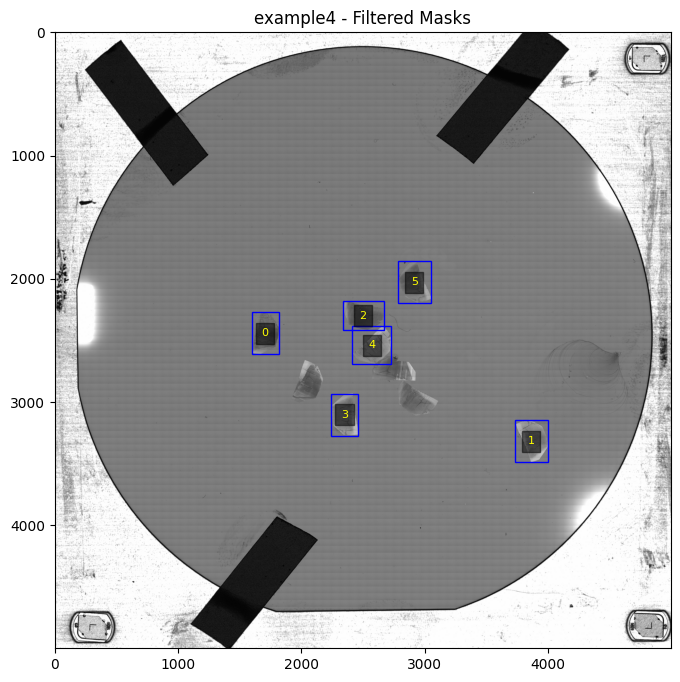

Time taken to run automatic_identification for example4.png: 0.99 seconds
Number of masks identified: 6


In [ ]:
# Write filtering=True to only identify sections
masks = automatic_identification(example4, checkpoint=checkpoint, compress=False, apply_filtering=True)
print(f"Number of masks identified: {len(masks)}")

In [ ]:
from section_identification.interactive import run_sam_interactive

new_masks, stored_masks, fiducials = run_sam_interactive(example4, checkpoint, masks, model_type="vit_h", device="cpu")

Quantized ONNX model already exists: /Users/fredericoaraujo/Documents/section_identification/images/example4_files/example4_onnx_quantized.onnx
[Info] Embedding already exists: /Users/fredericoaraujo/Documents/section_identification/images/example4_files/example4_embedding.npy
Image size: 5000x4999 (width x height), samScale: 0.205
Processing mask 1/6
Processing mask 2/6
Processing mask 3/6
Processing mask 4/6
Processing mask 5/6
Processing mask 6/6
[Info] Starting interactive segmentation. Move the mouse over the image to update mask.


2025-04-09 20:24:12.592 python[32215:15899201] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-09 20:24:12.592 python[32215:15899201] +[IMKInputSession subclass]: chose IMKInputSession_Modern


New mask added at position (2014, 2931, 1)
New mask added at position (2925, 3017, 1)
New mask added at position (2765, 2724, 1)
[Info] Exiting interactive segmentation.


Exported mask coordinates to /Users/fredericoaraujo/Documents/section_identification/images/example4_files/example4_mask_coordinates.csv


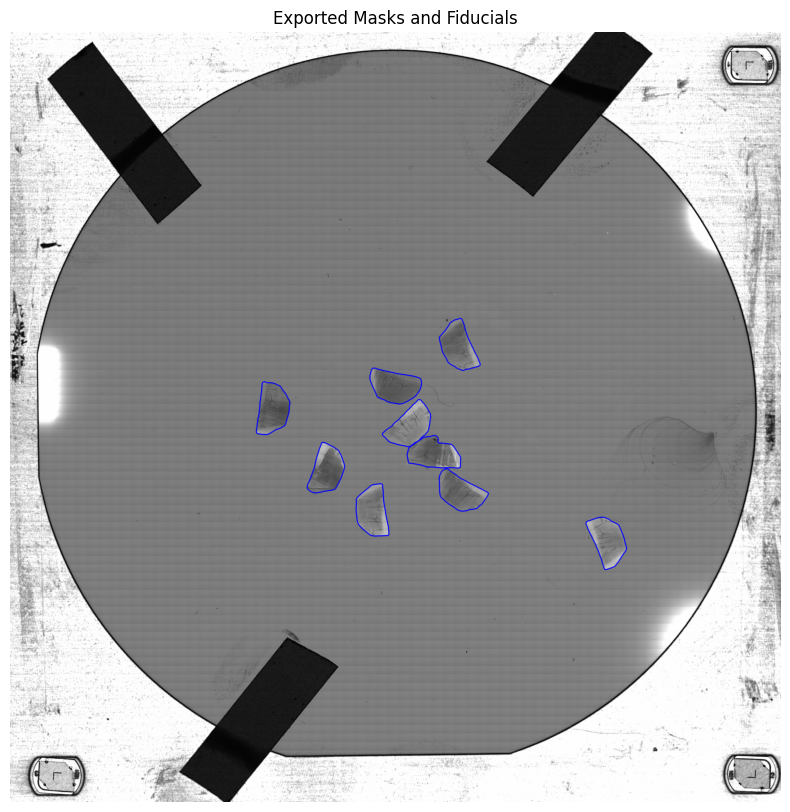

In [ ]:
from section_identification.export import export_mask_coordinates
csv_path = export_mask_coordinates(example4, new_masks, stored_masks, fiducials, visualize=True, sample_points=None)

In [ ]:
from ruler import run_ruler


img_path = "/Users/fredericoaraujo/Documents/force_sensor/Data/Experiment 16/photos/1.png"
calibration_path_075 = "/Users/fredericoaraujo/Documents/force_sensor/Data/Measurements_calibration/0.75.png"
calibration_path_1 = "/Users/fredericoaraujo/Documents/force_sensor/Data/Measurements_calibration/1.0.png"
calibration_path_125 = "/Users/fredericoaraujo/Documents/force_sensor/Data/Measurements_calibration/1.25.png"
calibration_path_1_new = "/Users/fredericoaraujo/Documents/force_sensor/Data/Measurements_calibration/1.0_new.png"

magnification = 0.75  # e.g. 0.75x
original_length_mm = 7.595  # Original reference length in mm
measurements = run_ruler(img_path, magnification, original_length_mm)
print("Final Measurements:")
for meas in measurements:
    print(meas)

[Debug] Using calibrated scale: effective_pixels_per_mm = 93.96, conversion_factor = 0.010643 mm/pixel
[Info] Exiting ruler interface.
Final Measurements:
((611, 287), (1266, 391), 7.058376931483896, 0.9293452181018955)
((694, 604), (984, 670), 3.1653419990185934, 0.41676655681614133)
((592, 374), (1229, 552), 7.039190061211528, 0.926818967901452)


In [ ]:
from section_identification.thesis import export_contour_image
export_contour_image(csv_path, example2)

Exported image with contours to /Users/fredericoaraujo/Documents/section_identification/images/example2_files/example2_final_drawing.png


'/Users/fredericoaraujo/Documents/section_identification/images/example2_files/example2_final_drawing.png'

In [ ]:
from section_identification.thesis import create_composite_image
# Set your folder paths
folder_before = "/Users/fredericoaraujo/Library/Mobile Documents/com~apple~CloudDocs/Harvard classes/ES 100/Image Library/Section_targeting/before_manual_detector"
folder_after  = "/Users/fredericoaraujo/Library/Mobile Documents/com~apple~CloudDocs/Harvard classes/ES 100/Image Library/Section_targeting/after_manual_detector"

# Create the composite image by calling the function
create_composite_image(folder_before, folder_after, output_filename="my_composite.jpg", max_rows=7)

Composite image saved as my_composite.jpg
